# COMPREHENSIVE STRENGTH OF CONCRETE

In [1]:
# IMPORT LIBRARIES
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import itertools 
%matplotlib inline 

In [2]:
from pyforest import*
lazy_imports()

['import pydot',
 'from sklearn.ensemble import RandomForestRegressor',
 'import awswrangler as wr',
 'from scipy import stats',
 'import tqdm',
 'import datetime as dt',
 'import os',
 'import lightgbm as lgb',
 'import glob',
 'import pickle',
 'import matplotlib.pyplot as plt',
 'import re',
 'from sklearn.linear_model import Lasso',
 'from sklearn.preprocessing import LabelEncoder',
 'import textblob',
 'from sklearn.cluster import KMeans',
 'import plotly.graph_objs as go',
 'import imutils',
 'from xlrd import open_workbook',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import spacy',
 'from sklearn.model_selection import train_test_split',
 'from sklearn.impute import SimpleImputer',
 'from pathlib import Path',
 'from sklearn.linear_model import LogisticRegression',
 'from fbprophet import Prophet',
 'from sklearn.linear_model import LassoCV',
 'from sklearn import svm',
 'from sklearn import metrics',


In [3]:
df = pd.read_csv("compresive_strength_concrete.csv")

<IPython.core.display.Javascript object>

In [4]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df = df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':'cement',
                        'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'slag',
                        'Fly Ash (component 3)(kg in a m^3 mixture)':'ash',
                        'Water (component 4)(kg in a m^3 mixture)':'water',
                        "Superplasticizer (component 5)(kg in a m^3 mixture)":'superplastic',
                        'Coarse Aggregate (component 6)(kg in a m^3 mixture)':'coarseagg',
                        'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fineagg',
                        'Age (day)':'age',
                        'Concrete compressive strength(MPa, megapascals)':'strength'
})

df.columns = ['cement','slag','ash','water','superplastic','coarseagg','fineagg','age','strength']

In [6]:
df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [7]:
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [8]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [9]:
df.shape

(1030, 9)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


**EXPLORATORY DATA ANALYSIS**

In [11]:
# cement 

from scipy import stats

Q1 = df['cement'].quantile(q = 0.25)
Q3 = df['cement'].quantile(q = 0.75)

print("1st quartile is:",Q1)
print("3rd quartile is:",Q3)
print("Interquartile range is ",stats.iqr(df['cement']))

1st quartile is: 192.375
3rd quartile is: 350.0
Interquartile range is  157.625


In [12]:
L_outliers = Q1-1.5*(Q3-Q1)
U_outliers = Q3+1.5*(Q3-Q1)
print("Lower outliers limit in cement is ",L_outliers)
print("Upper outliers limit in cement is ",U_outliers)

Lower outliers limit in cement is  -44.0625
Upper outliers limit in cement is  586.4375


In [13]:
print("Number of outliers in cement upper",df[df['cement']>586.4375]['cement'].count())

Number of outliers in cement upper 0


In [14]:
print("Number of outliers in cement upper",df[df['cement']<-44.0625]['cement'].count())

Number of outliers in cement upper 0


<IPython.core.display.Javascript object>

<Axes: xlabel='cement'>

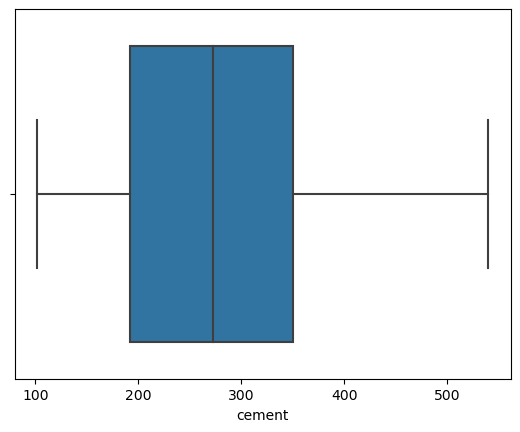

In [15]:
sns.boxplot(x='cement',data = df,orient='h')

<IPython.core.display.Javascript object>

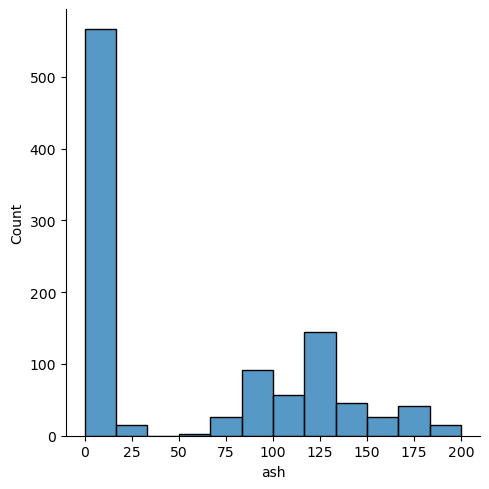

In [16]:
sns.displot(df["ash"])

**MULTIVARIATE PLOT**

In [17]:
for i in  df.columns: 
    print(i)

cement
slag
ash
water
superplastic
coarseagg
fineagg
age
strength


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='strength', ylabel='Density'>

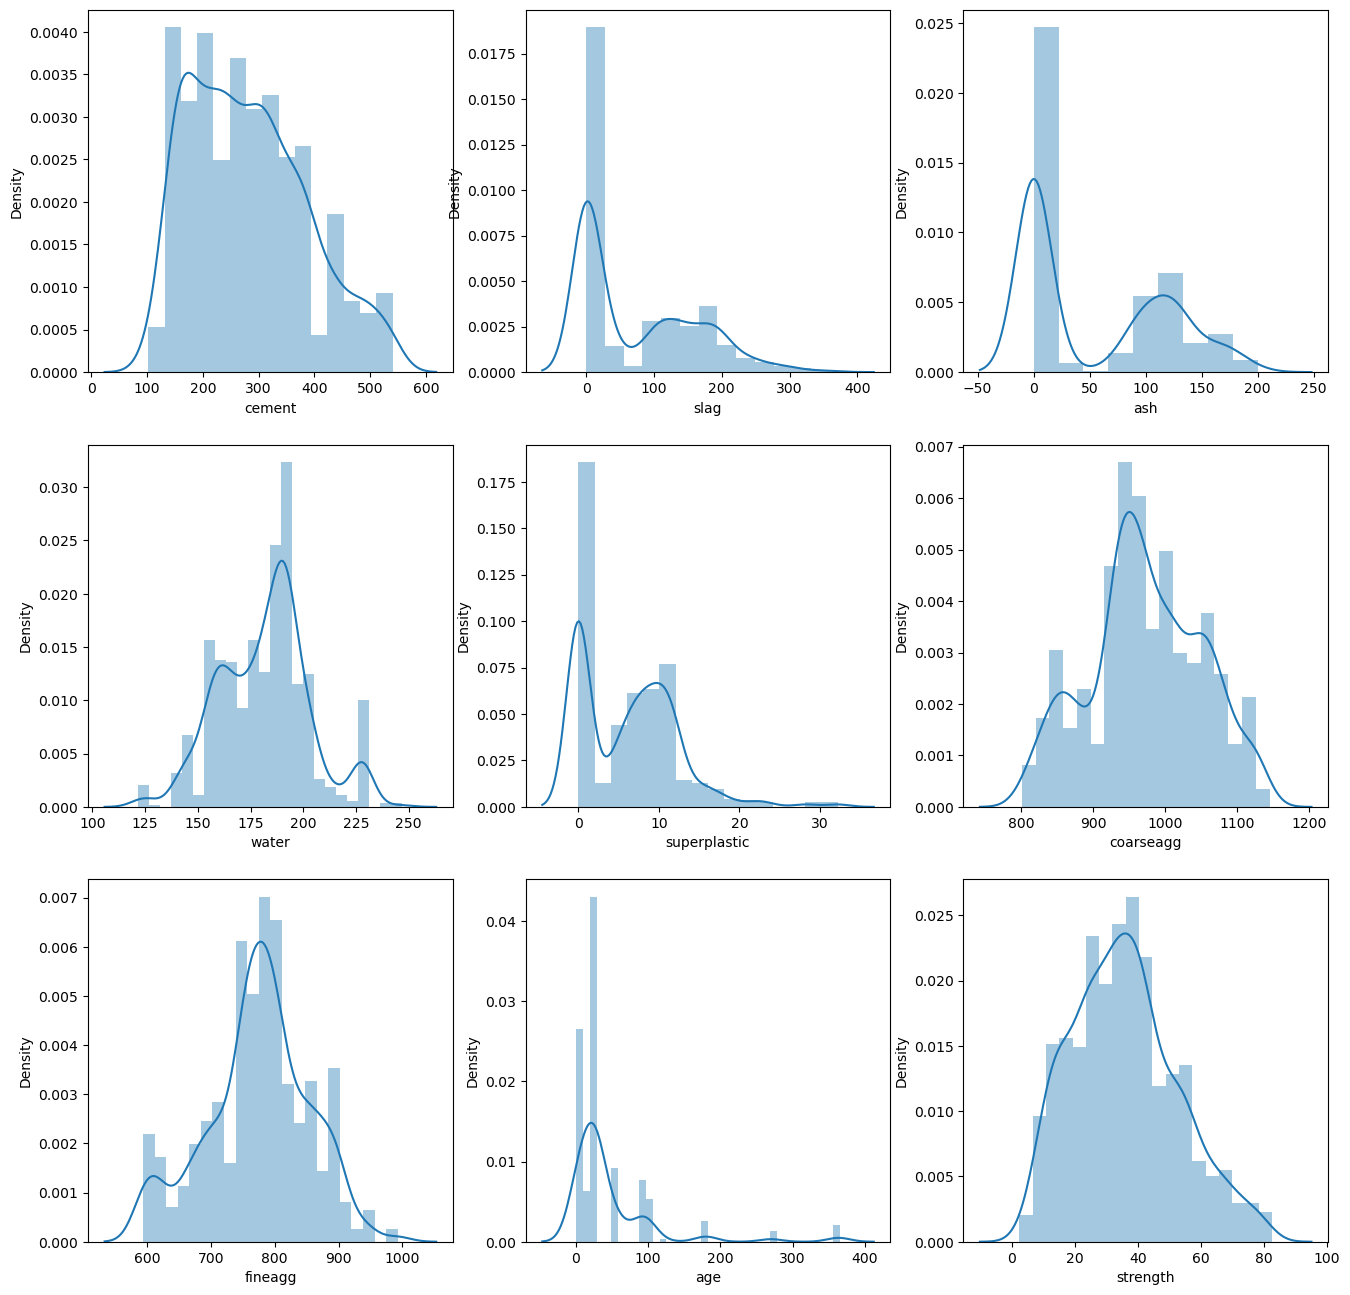

In [18]:
import warnings
warnings.simplefilter('ignore')
fig,ax2 = plt.subplots(3,3,figsize=(16,16))
sns.distplot(df['cement'],ax=ax2[0][0])
sns.distplot(df['slag'],ax=ax2[0][1])
sns.distplot(df['ash'],ax=ax2[0][2])
sns.distplot(df['water'],ax=ax2[1][0])
sns.distplot(df['superplastic'],ax=ax2[1][1])
sns.distplot(df['coarseagg'],ax=ax2[1][2])
sns.distplot(df['fineagg'],ax=ax2[2][0])
sns.distplot(df['age'],ax=ax2[2][1])
sns.distplot(df['strength'],ax=ax2[2][2])

<IPython.core.display.Javascript object>

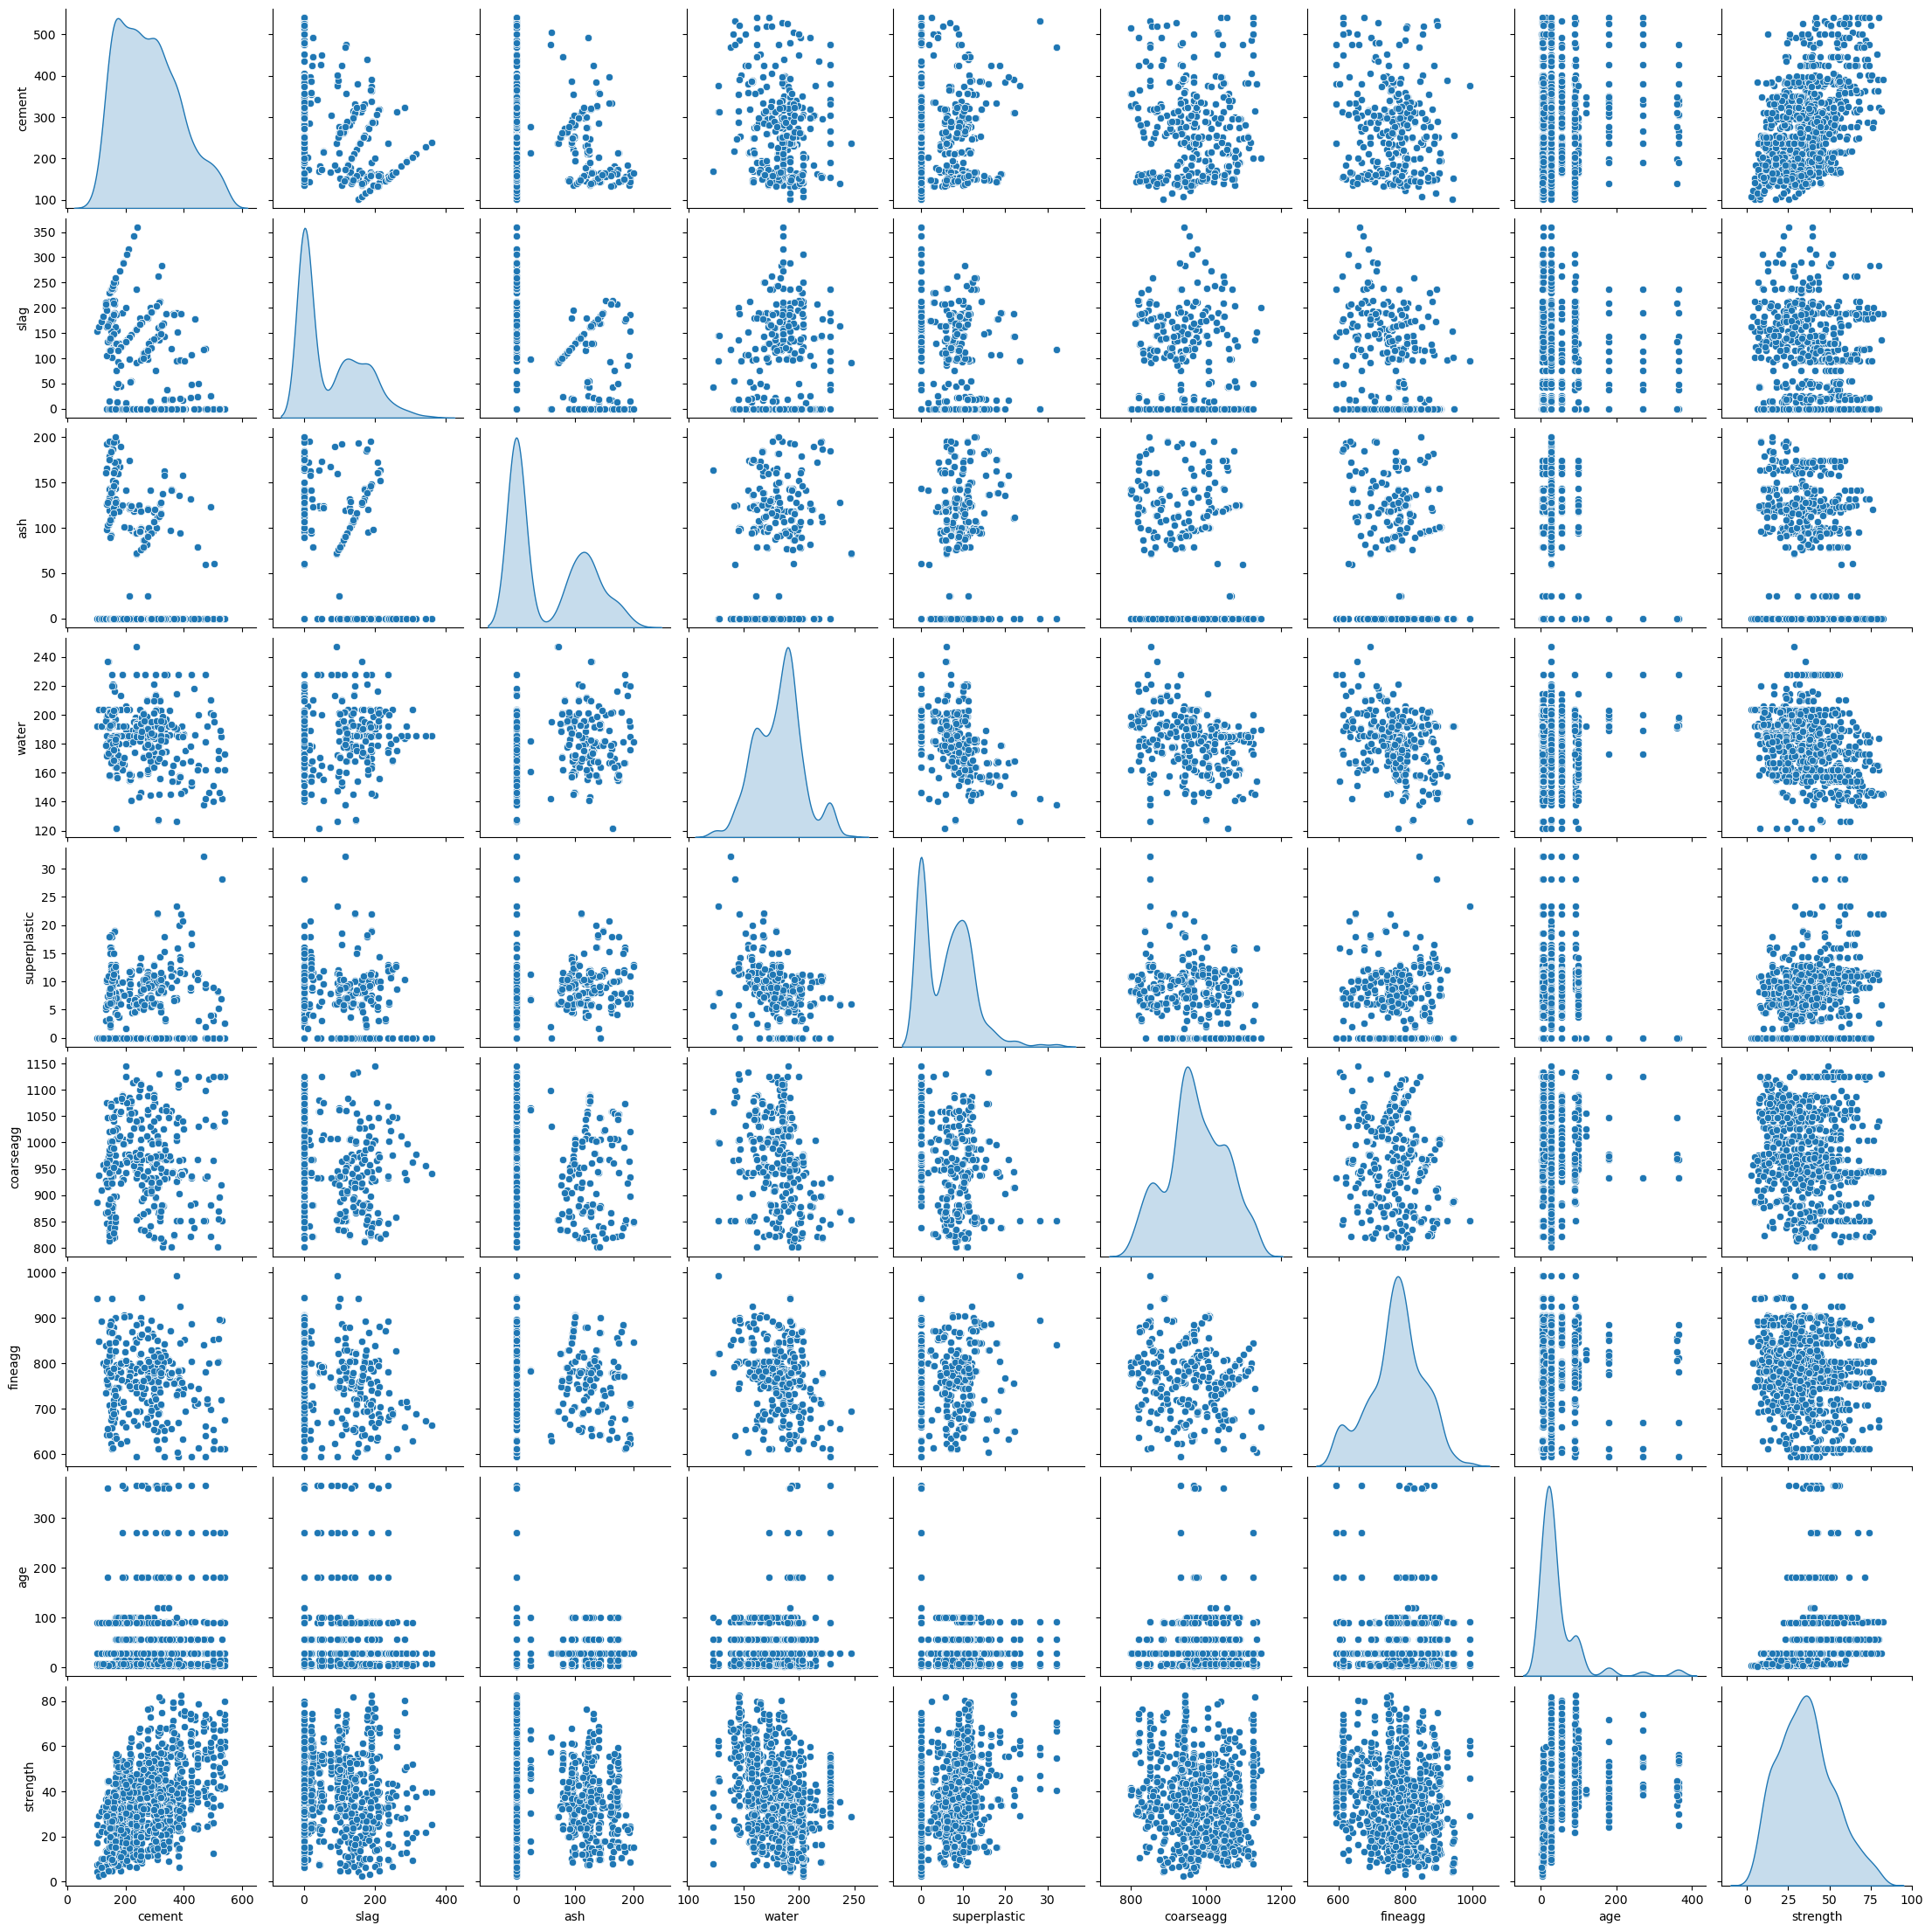

In [19]:
sns.pairplot(df,diag_kind = 'kde')

In [20]:
df.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

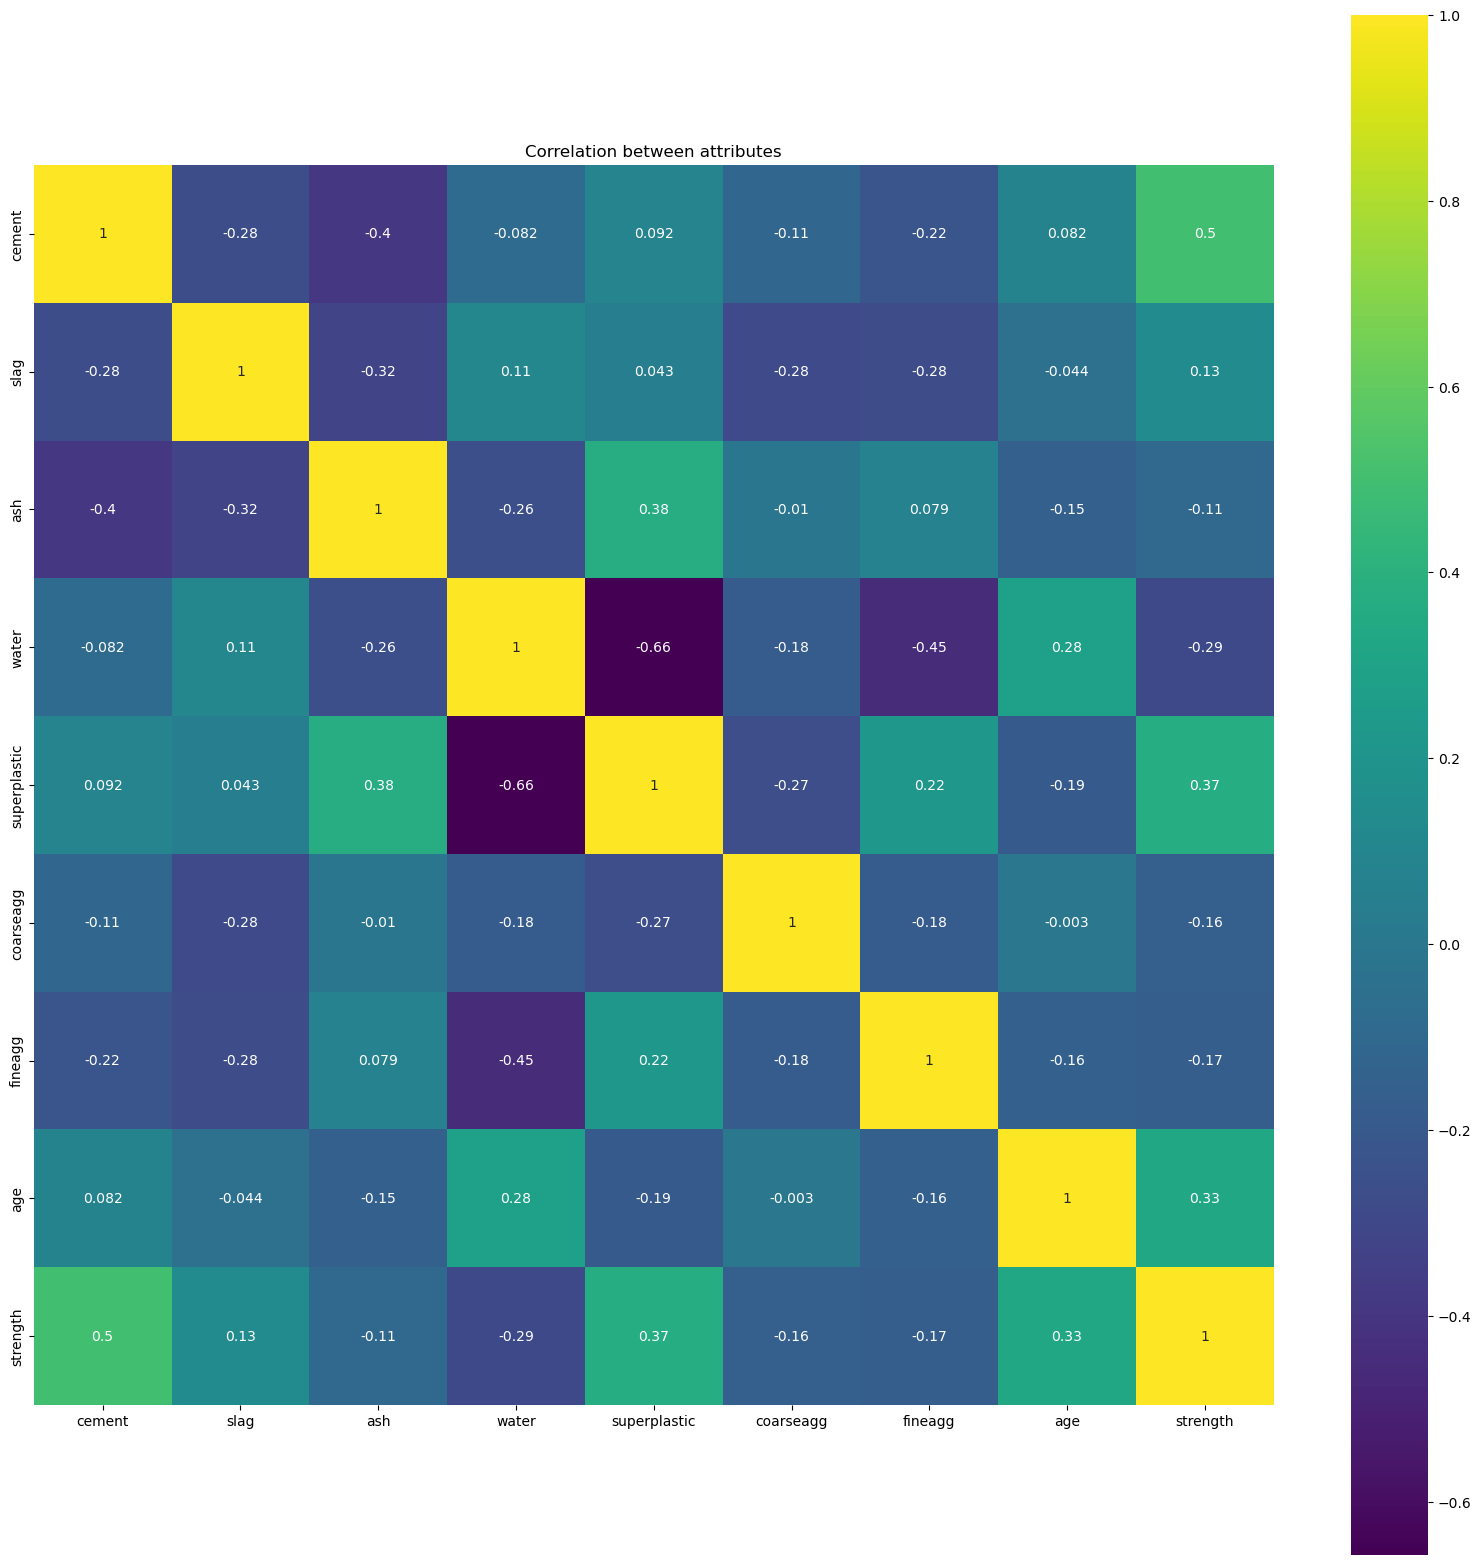

In [21]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),square=True,cmap='viridis',annot=True)
plt.title("Correlation between attributes")
plt.show()

<Axes: >

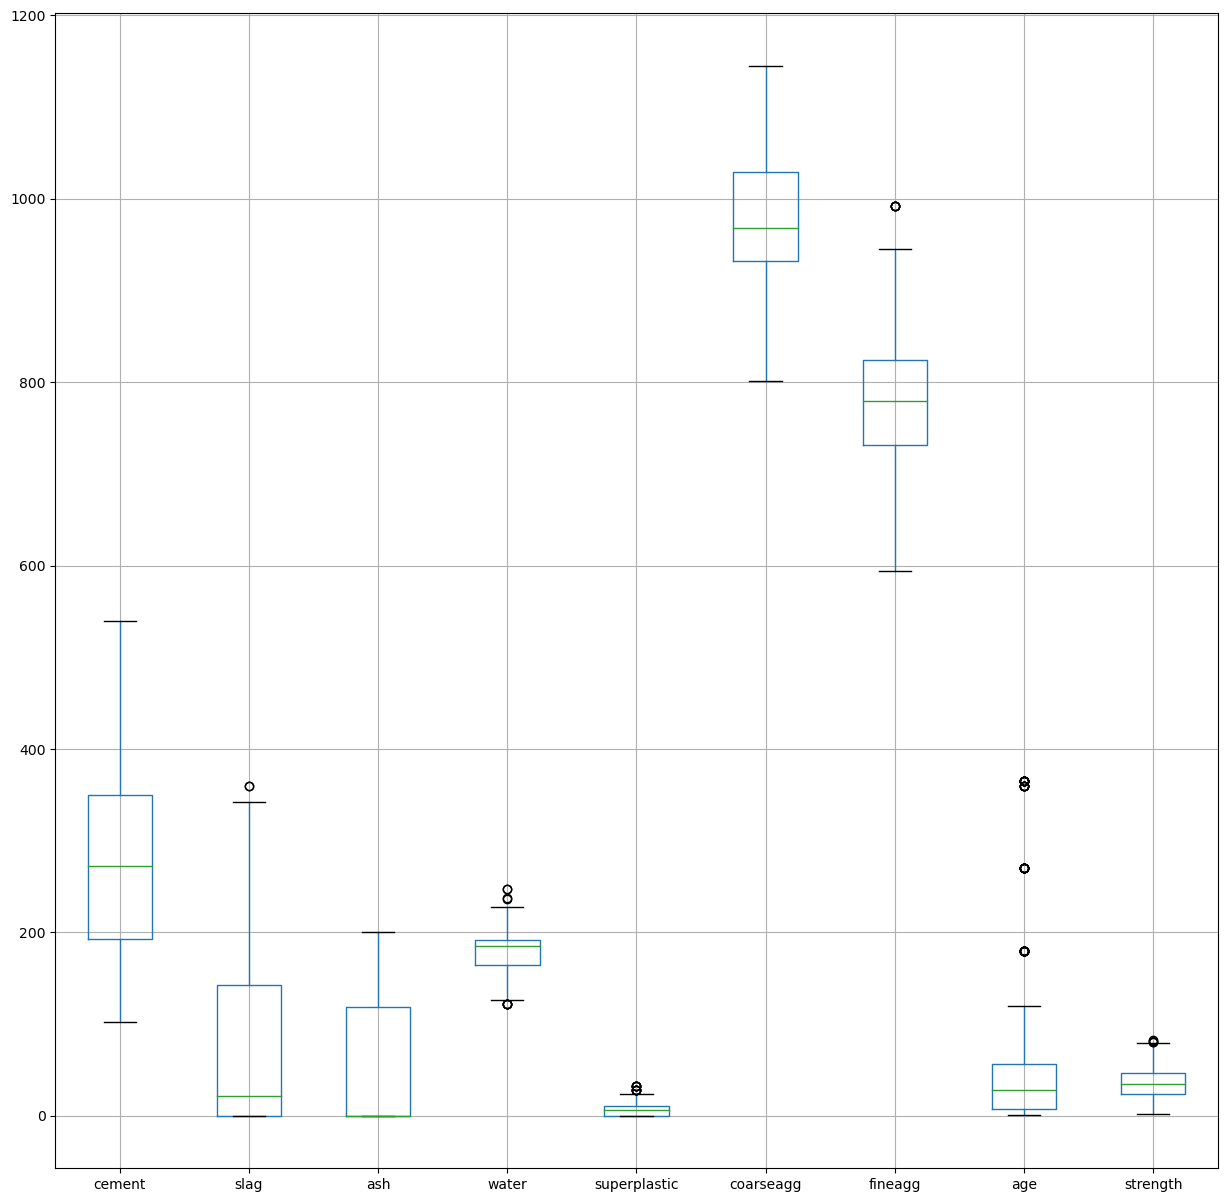

In [22]:
df.boxplot(figsize=(15,15))

**CHECKING FOR OUTLIERS**

In [23]:
for i in df.columns:
    print(i)

cement
slag
ash
water
superplastic
coarseagg
fineagg
age
strength


In [24]:
print('Outliers in cement: ', df[((df.cement - df.cement.mean())/df.cement.std()).abs()>3]['cement'].count())
print('Outliers in slag: ', df[((df.slag - df.slag.mean())/df.slag.std()).abs()>3]['slag'].count())
print('Outliers in ash: ', df[((df.ash - df.ash.mean())/df.ash.std()).abs()>3]['ash'].count())
print('Outliers in water: ', df[((df.water - df.water.mean())/df.water.std()).abs()>3]['water'].count())
print('Outliers in superplastic: ', df[((df.superplastic - df.superplastic.mean())/df.superplastic.std()).abs()>3]['superplastic'].count())
print('Outliers in coarseagg: ', df[((df.coarseagg - df.coarseagg.mean())/df.coarseagg.std()).abs()>3]['coarseagg'].count())
print('Outliers in fineagg: ', df[((df.fineagg - df.fineagg.mean())/df.fineagg.std()).abs()>3]['fineagg'].count())
print('Outliers in age: ', df[((df.age - df.age.mean())/df.age.std()).abs()>3]['age'].count())

Outliers in cement:  0
Outliers in slag:  4
Outliers in ash:  0
Outliers in water:  2
Outliers in superplastic:  10
Outliers in coarseagg:  0
Outliers in fineagg:  0
Outliers in age:  33


In [25]:
for cols in df.columns[:-1]:
  Q1 = df[cols].quantile(0.25)
  Q3 = df[cols].quantile(0.75)
  iqr = Q3 - Q1

  low = Q1-1.5*iqr
  high = Q3+1.5*iqr
  df.loc[(df[cols] < low) | (df[cols] > high), cols] = df[cols].median()

<Axes: >

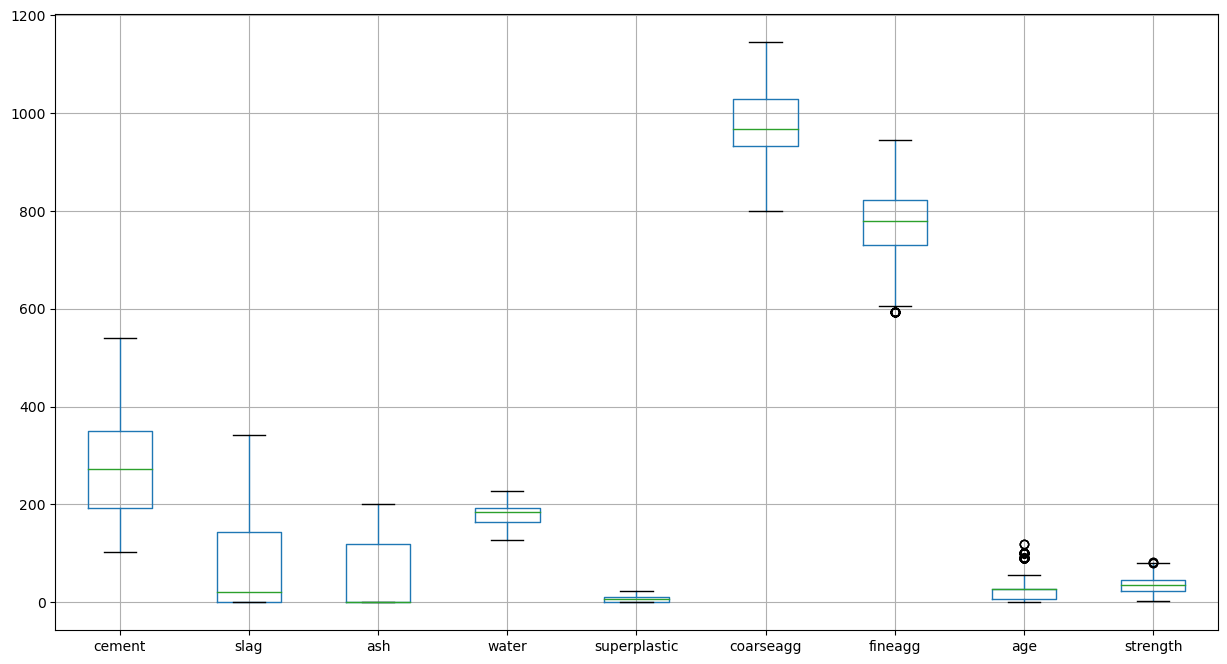

In [26]:
df.boxplot(figsize=(15,8))

**FEATURE ENGINEERING AND MODEL BUILDING**

In [27]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,44.30


In [28]:
x = df.drop("strength",axis = 1)
y = df['strength']

In [29]:
from scipy.stats import zscore

xscaled = x.apply(zscore)

In [30]:
xscaled

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,2.477915,-0.858192,-0.847144,-0.954349,-0.634503,0.863154,-1.227306,-0.153159
1,2.477915,-0.858192,-0.847144,-0.954349,-0.634503,1.056164,-1.227306,-0.153159
2,0.491425,0.811541,-0.847144,2.250592,-1.091166,-0.526517,-2.269700,-0.153159
3,0.491425,0.811541,-0.847144,2.250592,-1.091166,-0.526517,-2.269700,-0.153159
4,-0.790459,0.693195,-0.847144,0.502442,-1.091166,0.070527,0.673158,-0.153159
...,...,...,...,...,...,...,...,...
1025,-0.045645,0.501029,0.564545,-0.099698,0.534552,-1.323005,-0.053976,-0.153159
1026,0.392819,-0.858192,0.960068,0.696681,0.808549,-1.994680,0.519341,-0.153159
1027,-1.270088,0.775217,0.850635,0.536434,0.023090,-1.036064,0.094756,-0.153159
1028,-1.168610,1.329451,-0.847144,-0.293937,0.972948,0.214641,0.207894,-0.153159


In [31]:
x_train,x_test,y_train,y_test = train_test_split(xscaled,y,test_size = 0.3,random_state = 1)

<IPython.core.display.Javascript object>

**BUILDING MODEL**

**RANDOM FOREST**

In [32]:
model = RandomForestRegressor()
model.fit(x_train,y_train)

<IPython.core.display.Javascript object>

RandomForestRegressor()

In [33]:
y_predict = model.predict(x_test)

In [34]:
model.score(x_train,y_train)

0.9812021758736601

In [35]:
model.score(x_test,y_test)

0.8762878584395111

In [36]:
accuracy1 = metrics.r2_score(y_test,y_predict)
accuracy1

<IPython.core.display.Javascript object>

0.8762878584395111

In [37]:
metrics.mean_squared_error(y_test,y_predict)

<IPython.core.display.Javascript object>

32.425842908371

In [38]:
rf_acc= pd.DataFrame({'Algorithm':['Random Forest'],'accuracy':accuracy1},index = ['1'])
results = rf_acc[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.876288


**K FOLD CROSS VALIDATION**

In [39]:
k  = 20 

kfold = KFold(n_splits=k,random_state=70,shuffle=True)
k_results = cross_val_score(model,x,y,cv=kfold)
accuracy2 = np.mean(abs(k_results))
accuracy2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.9078457686051514

In [40]:
kfold_1 = pd.DataFrame({'Algorithm':['K Fold cross validation'],'accuracy':accuracy2},index = ['2'])
results = pd.concat([results,kfold_1])
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.876288
2,K Fold cross validation,0.907846


**GRADIENT BOOSTING REGRESSOR**

In [41]:
model = GradientBoostingRegressor()
model.fit(x_train,y_train)

<IPython.core.display.Javascript object>

GradientBoostingRegressor()

In [42]:
gbr_predict = model.predict(x_test)

In [43]:
model.score(x_train,y_train)

0.9477368610390589

In [44]:
gbr_accuracy = model.score(x_test,y_test)
gbr_accuracy

0.8802767710017717

In [45]:
gb_acc = pd.DataFrame({'Algorithm':['Gradient boost regressor'],'accuracy':gbr_accuracy},index = ['3'])
results = pd.concat([results,gb_acc])
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.876288
2,K Fold cross validation,0.907846
3,Gradient boost regressor,0.880277


**K FOLD CROSS VALIDATION**

In [46]:
k  = 20 

kfold = KFold(n_splits=k,random_state=70,shuffle=True)
result_3= cross_val_score(model,x,y,cv=kfold)
accuracy3 = np.mean(abs(result_3))
accuracy3

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.8976102532163421

In [47]:
kfold_2 = pd.DataFrame({'Algorithm':['Gradient boost regressor k fold'],'accuracy':accuracy3},index = ['4'])
results = pd.concat([results,kfold_2])
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.876288
2,K Fold cross validation,0.907846
3,Gradient boost regressor,0.880277
4,Gradient boost regressor k fold,0.897610


**ADA BOOST REGRESSOR**

In [48]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(x_train,y_train)

AdaBoostRegressor()

In [49]:
ab_predict = model.predict(x_test)

In [50]:
model.score(x_train,y_train)

0.8220832643464335

In [51]:
aa_ada = metrics.r2_score(y_test,ab_predict)
aa_ada

<IPython.core.display.Javascript object>

0.7619136568106355

In [52]:
ada_acc = pd.DataFrame({'Algorithm':['Ada boost regressor '],'accuracy':aa_ada},index = ['5'])
results = pd.concat([results,ada_acc])
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.876288
2,K Fold cross validation,0.907846
3,Gradient boost regressor,0.880277
4,Gradient boost regressor k fold,0.897610
5,Ada boost regressor,0.761914


**K FOLD CROSS VALIDATION**

In [53]:
k  = 20 

kfold = KFold(n_splits=k,random_state=70,shuffle=True)
result_4= cross_val_score(model,x,y,cv=kfold)
accuracy4 = np.mean(abs(result_4))
accuracy4

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.7797785453006691

In [54]:
k_fold_acc_3 = pd.DataFrame({'Algorithm':['Ada boost regressor k fold '],'accuracy':aa_ada},index = ['6'])
results = pd.concat([results,k_fold_acc_3 ])
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.876288
2,K Fold cross validation,0.907846
3,Gradient boost regressor,0.880277
4,Gradient boost regressor k fold,0.897610
5,Ada boost regressor,0.761914
6,Ada boost regressor k fold,0.761914


**KNN REGRESSOR**

In [55]:
from sklearn.neighbors import KNeighborsRegressor
diff_k = []
for i in range(1,45):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    knn_predict = knn.predict(x_test)
    diff_k.append(np.mean(knn_predict != y_test))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Mean error')

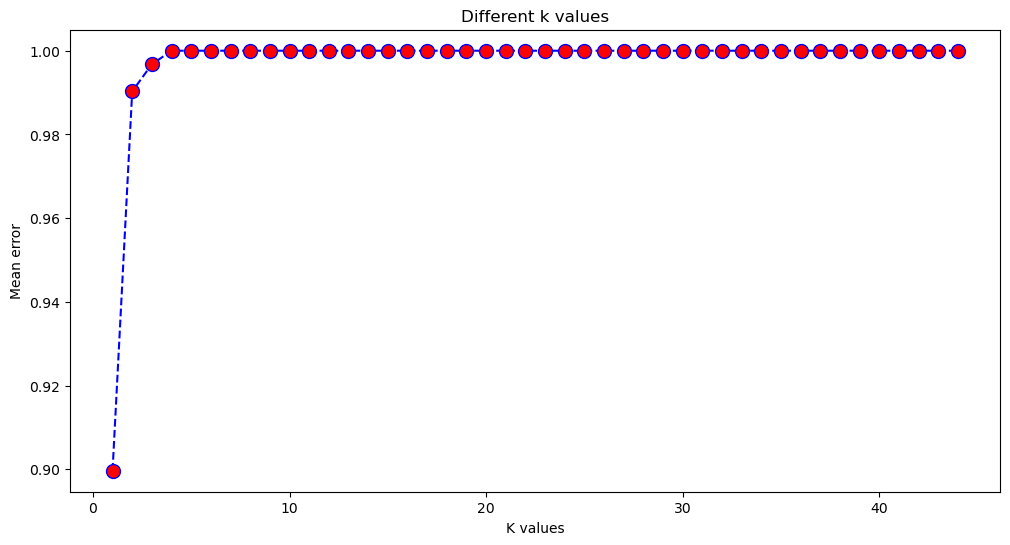

In [56]:
plt.figure(figsize=(12,6))
plt.plot(range(1,45), diff_k, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title("Different k values")
plt.xlabel("K values")
plt.ylabel("Mean error")

In [57]:
model = KNeighborsRegressor(n_neighbors = 3)
model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [58]:
knn_predict = knn.predict(x_test)

In [59]:
model.score(x_train,y_train)

0.9069857173257587

In [60]:
knn_score = model.score(x_test,y_test)

In [61]:
knn_score

0.7538075164015781

In [62]:
knn_acc = pd.DataFrame({'Algorithm':['KNN Regressor '],'accuracy':knn_score},index = ['7'])
results = pd.concat([results,knn_acc])
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.876288
2,K Fold cross validation,0.907846
3,Gradient boost regressor,0.880277
4,Gradient boost regressor k fold,0.897610
5,Ada boost regressor,0.761914
6,Ada boost regressor k fold,0.761914
7,KNN Regressor,0.753808


**K FOLD VALIDATION**

In [63]:
k  = 20 

kfold = KFold(n_splits=k,random_state=70,shuffle=True)
result_5= cross_val_score(model,x,y,cv=kfold)
accuracy5 = np.mean(abs(result_5))
accuracy5

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.7050124120906828

In [64]:
kfold_acc4 = pd.DataFrame({'Algorithm':['KNN Regressor k fold validaiton '],'accuracy':accuracy5},index = ['8'])
results = pd.concat([results,kfold_acc4])
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.876288
2,K Fold cross validation,0.907846
3,Gradient boost regressor,0.880277
4,Gradient boost regressor k fold,0.897610
5,Ada boost regressor,0.761914
6,Ada boost regressor k fold,0.761914
7,KNN Regressor,0.753808
8,KNN Regressor k fold validaiton,0.705012


**BAGGING REGRESSOR**

In [65]:
from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor()
model.fit(x_train,y_train)

BaggingRegressor()

In [66]:
br_predict = model.predict(x_test)

In [67]:
model.score(x_train,y_train)

0.9752899976738268

In [68]:
model.score(x_test,y_test)

0.8630276574214816

In [69]:
bg_acc = metrics.r2_score(y_test,br_predict)
bg_acc

<IPython.core.display.Javascript object>

0.8630276574214816

In [70]:
bg_accuracy = pd.DataFrame({'Algorithm':['Bagging Regressor '],'accuracy':bg_acc},index = ['9'])
results = pd.concat([results,bg_accuracy])
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.876288
2,K Fold cross validation,0.907846
3,Gradient boost regressor,0.880277
4,Gradient boost regressor k fold,0.897610
5,Ada boost regressor,0.761914
6,Ada boost regressor k fold,0.761914
7,KNN Regressor,0.753808
8,KNN Regressor k fold validaiton,0.705012
9,Bagging Regressor,0.863028


**K FOLD VALIDATION**

In [71]:
k  = 20 

kfold = KFold(n_splits=k,random_state=70,shuffle=True)
result_6= cross_val_score(model,x,y,cv=kfold)
accuracy6 = np.mean(abs(result_6))
accuracy6

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.9009540385949044

In [72]:
kfold_acc5 = pd.DataFrame({'Algorithm':['Bagging  Regressor k fold validaiton '],'accuracy':accuracy6},index = ['10'])
results = pd.concat([results,kfold_acc5])
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.876288
2,K Fold cross validation,0.907846
3,Gradient boost regressor,0.880277
4,Gradient boost regressor k fold,0.897610
5,Ada boost regressor,0.761914
6,Ada boost regressor k fold,0.761914
7,KNN Regressor,0.753808
8,KNN Regressor k fold validaiton,0.705012
9,Bagging Regressor,0.863028
10,Bagging Regressor k fold validaiton,0.900954


**SUPPORT VECTOR REGRESSOR**

In [73]:
from sklearn.svm import SVR
model = SVR(kernel='linear')
model.fit(x_train,y_train)

SVR(kernel='linear')

In [74]:
sv_predict = model.predict(x_test)

In [75]:
model.score(x_train,y_train)

0.7296525761559521

In [76]:
model.score(x_test,y_test)

0.6549962611822545

In [77]:
sv_acc = metrics.r2_score(y_test,sv_predict)
sv_acc

<IPython.core.display.Javascript object>

0.6549962611822545

In [78]:
sv_accuracy = pd.DataFrame({'Algorithm':['Support vector  Regressor '],'accuracy':sv_acc},index = ['11'])
results = pd.concat([results,sv_accuracy])
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.876288
2,K Fold cross validation,0.907846
3,Gradient boost regressor,0.880277
4,Gradient boost regressor k fold,0.897610
5,Ada boost regressor,0.761914
6,Ada boost regressor k fold,0.761914
7,KNN Regressor,0.753808
8,KNN Regressor k fold validaiton,0.705012
9,Bagging Regressor,0.863028
10,Bagging Regressor k fold validaiton,0.900954
